In [1]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

## 1. Identifying columns with mixed data types:

In [2]:
# read the dataset
df = pd.read_csv('dataset.csv')

In [3]:
# check the data types of each column
df.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [4]:
# create an empty list to store columns with mixed data types
mixed_columns = []

# iterate through each column
for column in df.columns:
    # check if the column has more than one unique data type
    if len(df[column].apply(type).unique()) > 1:
        # if so, add the column to the list of mixed columns
        mixed_columns.append(column)

In [5]:
print(mixed_columns)

['region', 'province', 'city', 'claimed', 'awards', 'popularity_detailed', 'popularity_generic', 'top_tags', 'price_level', 'price_range', 'meals', 'cuisines', 'special_diets', 'features', 'original_open_hours', 'default_language', 'keywords']


In [6]:
print(df.region.apply(type).unique())

[<class 'str'> <class 'float'>]


In [7]:
region_float = df[df['region'].apply(lambda x: isinstance(x, float))]

In [8]:
region_float.region.head()

26528     NaN
26529     NaN
155288    NaN
155289    NaN
155290    NaN
Name: region, dtype: object

In [9]:
print(df.features.apply(type).unique())

[<class 'str'> <class 'float'>]


## 2. Counting the number of rows per data type for each column

In [10]:
# create an empty dictionary to store the data type counts
data_type_counts = {}

# iterate through each mixed column
for column in mixed_columns:
    # get the counts of each data type in the column
    counts = df[column].apply(type).value_counts()
    # add the counts to the dictionary with the column name as the key
    data_type_counts[column] = counts

# print the dictionary
print(data_type_counts)


{'region': <class 'str'>      1033074
<class 'float'>      50323
Name: region, dtype: int64, 'province': <class 'str'>      742765
<class 'float'>    340632
Name: province, dtype: int64, 'city': <class 'str'>      682712
<class 'float'>    400685
Name: city, dtype: int64, 'claimed': <class 'str'>      1081555
<class 'float'>       1842
Name: claimed, dtype: int64, 'awards': <class 'float'>    820264
<class 'str'>      263133
Name: awards, dtype: int64, 'popularity_detailed': <class 'str'>      988409
<class 'float'>     94988
Name: popularity_detailed, dtype: int64, 'popularity_generic': <class 'str'>      985605
<class 'float'>     97792
Name: popularity_generic, dtype: int64, 'top_tags': <class 'str'>      972763
<class 'float'>    110634
Name: top_tags, dtype: int64, 'price_level': <class 'str'>      806192
<class 'float'>    277205
Name: price_level, dtype: int64, 'price_range': <class 'float'>    779070
<class 'str'>      304327
Name: price_range, dtype: int64, 'meals': <class 'st

In [11]:
# create a dictionary to store the float count for each mixed column
float_counts = {}

# iterate through each mixed column
for column in mixed_columns:
    # get the float count for the column
    float_count = df[column].apply(lambda x: type(x) == float).sum()
    # add the float count to the dictionary with the column name as the key
    float_counts[column] = float_count

# print the dictionary
float_counts


{'region': 50323,
 'province': 340632,
 'city': 400685,
 'claimed': 1842,
 'awards': 820264,
 'popularity_detailed': 94988,
 'popularity_generic': 97792,
 'top_tags': 110634,
 'price_level': 277205,
 'price_range': 779070,
 'meals': 448050,
 'cuisines': 169103,
 'special_diets': 743141,
 'features': 765990,
 'original_open_hours': 489565,
 'default_language': 95193,
 'keywords': 984199}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

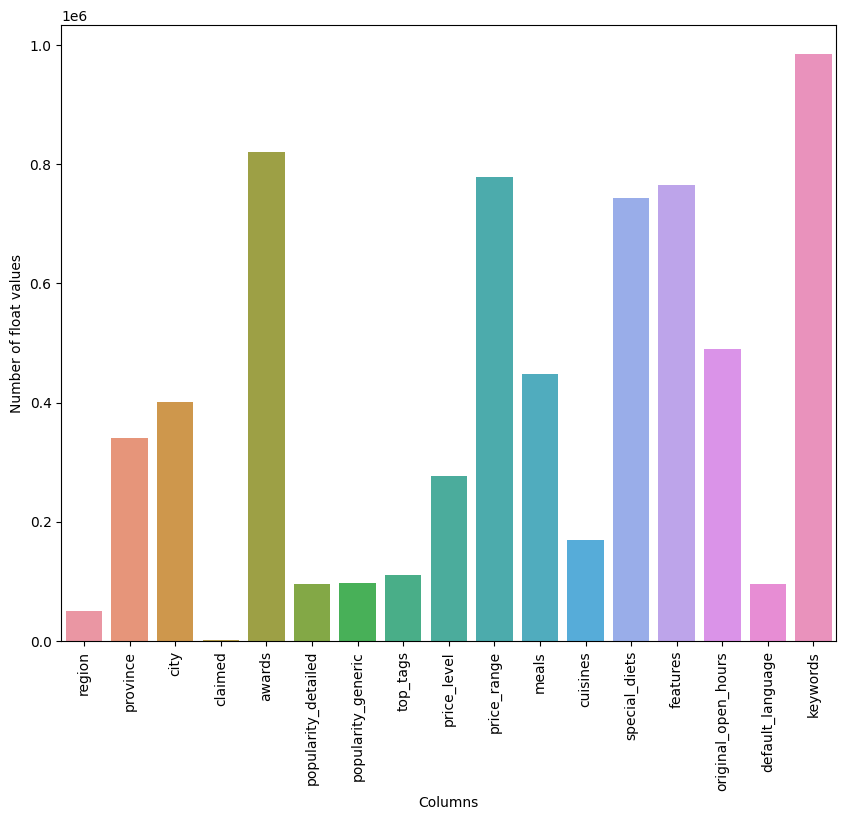

In [12]:
# Visualize the float counts using a barplot
plt.figure(figsize=(10,8))
sns.barplot(x=list(float_counts.keys()), y=list(float_counts.values()))
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of float values')
plt.show()

In [13]:
# Filter dataframe to only include columns of 'object' dtype
object_cols = df.select_dtypes(include='object')

# Count the number of null values in each column
null_counts = object_cols.isnull().sum()

In [14]:
null_counts

restaurant_link             0
restaurant_name             0
original_location           0
country                     0
region                  50323
province               340632
city                   400685
address                     0
claimed                  1842
awards                 820264
popularity_detailed     94988
popularity_generic      97792
top_tags               110634
price_level            277205
price_range            779070
meals                  448050
cuisines               169103
special_diets          743141
features               765990
vegetarian_friendly         0
vegan_options               0
gluten_free                 0
original_open_hours    489565
default_language        95193
keywords               984199
dtype: int64

## 3. Would removing missing values solve the mixed data type problem?

The best practice for handling missing values in a dataset depends on the specific situation and the goals of the analysis. Generally, the following strategies are commonly used:

Remove rows or columns with missing values: This approach is appropriate if the proportion of missing values is small and if the missing values are not informative. However, this approach can lead to a loss of important information and could bias the analysis.

Impute missing values: This approach involves replacing missing values with estimates based on the other values in the dataset. Common methods include mean imputation, median imputation, and multiple imputation. This approach can be useful if the proportion of missing values is moderate, but it can be problematic if the data is missing not at random.

Keep the missing values: This approach is appropriate if the data is missing at random and if the missing values are informative. For example, if a variable is missing because it was not applicable or not asked, then keeping the missing values can be useful.

Ultimately, the best approach will depend on the specific dataset and the goals of the analysis. It is always a good idea to explore the missingness patterns and the distribution of the data before making a decision on how to handle missing values.
